In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from glob import glob

In [3]:
input_family = open("/content/gdrive/My Drive/Retail Pulse ML Assignment Data/families.txt","r").read().split("\n")[:-1]
len(input_family)

70

In [4]:
variant = open("/content/gdrive/My Drive/Retail Pulse ML Assignment Data/variants.txt","r").read().split("\n")[:-1]
len(variant)

100

In [5]:
training_data=glob("/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/*/*.jpg")

In [6]:
training_data

['/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000007.jpg',
 '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000011.jpg',
 '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000018.jpg',
 '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000015.jpg',
 '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000029.jpg',
 '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000003.jpg',
 '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000030.jpg',
 '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000025.jpg',
 '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000019.jpg',
 '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000034.jpg',
 '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000032.jpg',
 '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000024.jpg',
 '/c

In [7]:
train = [[int(i.split("/")[6]),i] for i in training_data]


In [ ]:
train

[[97,
  '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000007.jpg'],
 [97,
  '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000011.jpg'],
 [97,
  '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000018.jpg'],
 [97,
  '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000015.jpg'],
 [97,
  '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000029.jpg'],
 [97,
  '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000003.jpg'],
 [97,
  '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000030.jpg'],
 [97,
  '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000025.jpg'],
 [97,
  '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000019.jpg'],
 [97,
  '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000034.jpg'],
 [97,
  '/content/gdrive/My Drive/Retail Pulse ML Assignment Data/train/0097/000032.jpg'],

In [ ]:
type(train) 

list

In [8]:
train = [[variant[i-1],j] for i,j in train]

In [9]:
train = pd.DataFrame(train,columns=['variant','image'])

In [10]:
training_family = pd.DataFrame([
    [i.split(" ")[0]," ".join(i.split(" ")[1:])]
    for i in 
        open("/content/gdrive/My Drive/Retail Pulse ML Assignment Data/images_family_train.txt","r").read().split("\n")[:-1]
],columns=['id','family'])

training_variant = pd.DataFrame([
    [i.split(" ")[0]," ".join(i.split(" ")[1:])]
    for i in 
        open("/content/gdrive/My Drive/Retail Pulse ML Assignment Data/images_variant_train.txt","r").read().split("\n")[:-1]
],columns=['id','variant'])

In [11]:
family_var_mapping = training_family.merge(training_variant)

In [12]:
mappings = family_var_mapping.groupby('variant')

In [13]:
train['family'] = train.variant.apply(lambda x:mappings.get_group(x).family.values[0])

In [14]:
from tqdm.notebook import tqdm

In [15]:
H,W = set(),set()

for i in tqdm(training_data):
    h,w,c = cv2.imread(i).shape
    H.add(h)
    W.add(w)

In [16]:
images = np.array([
    cv2.resize(
        cv2.cvtColor(
            cv2.imread(i),
            cv2.COLOR_BGR2RGB
        ),
        (64,64),
        interpolation=cv2.INTER_CUBIC
    )
    
    for 
        i
    in
        tqdm(train.image.values)
])

In [17]:
train_group = train.groupby("family")

In [18]:
groups = list(train_group.groups.keys())

Family :  ATR-42


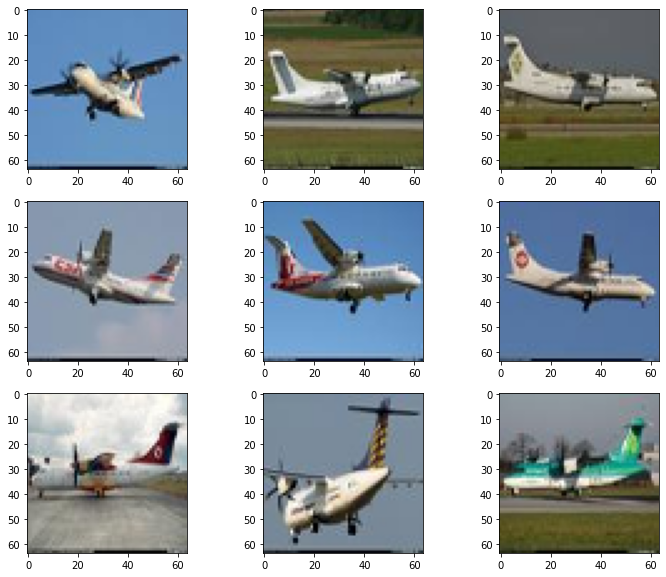

In [19]:
group = groups[6]
index = train_group.get_group(group).index[:100]

fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(12,10)) 
for img,axs in zip(images[index.copy()],axes.reshape(-1)):
    axs.imshow(img)

print ("Family : ",group)

In [20]:
val_dir = glob("/content/gdrive/My Drive/Retail Pulse ML Assignment Data/val/*/*.jpg")